In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# 1. Khám phá dữ liệu
# - Đọc dữ liệu từ file CSV vào pandas.DataFrame.
# - Hiển thị 5 dòng đầu tiên.
# - Vẽ biểu đồ phân tán (scatter plot) giữa hours_studied và exam_score.
# - Tính hệ số tương quan giữa exam_score và các biến đầu vào (hours_studied, sleep_hours, attendance_percent, previous_scores).
# => Câu hỏi: Biến nào có tương quan mạnh nhất với exam_score?

# 2. Xây dựng mô hình hồi quy tuyến tính đa biến
# - Chọn X = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores'].
# - Chọn y = exam_score.
# - Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test) với tỉ lệ 80:20.
# - Dùng LinearRegression của sklearn.linear_model để huấn luyện mô hình.
# - Dự đoán y_pred = model.predict(X_test).
# => In ra giá trị R² và MSE.

In [4]:
df = pd.read_csv("student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [5]:
df.shape

(200, 6)

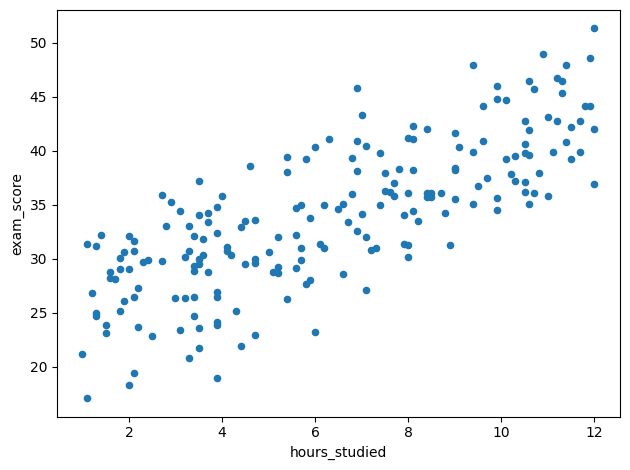

In [11]:
#1
df.plot.scatter(
    x = "hours_studied",
    y = "exam_score"
)
plt.tight_layout()
plt.show()

In [34]:
d1 = df["exam_score"].corr(df["hours_studied"])
d1

np.float64(0.7767514349789605)

In [ ]:
d2 = df["exam_score"].corr(df["sleep_hours"])
d2

In [35]:
d3 = df["exam_score"].corr(df["previous_scores"])
d3

np.float64(0.43110471124797906)

In [36]:
d4 = df["exam_score"].corr(df["attendance_percent"])
d4

np.float64(0.22571260459020473)

In [ ]:
# Tìm hệ số tương quan lớn nhất
if d1 > d2 and d1 > d3 and d1 > d4:
    print(d1)
elif d2 > d1 and d2 > d3 and d2 > d4:
    print(d2)
elif d3 > d1 and d3 > d2 and d3 > d4:
    print(d3)
else:
    print(d4)

0.7767514349789605


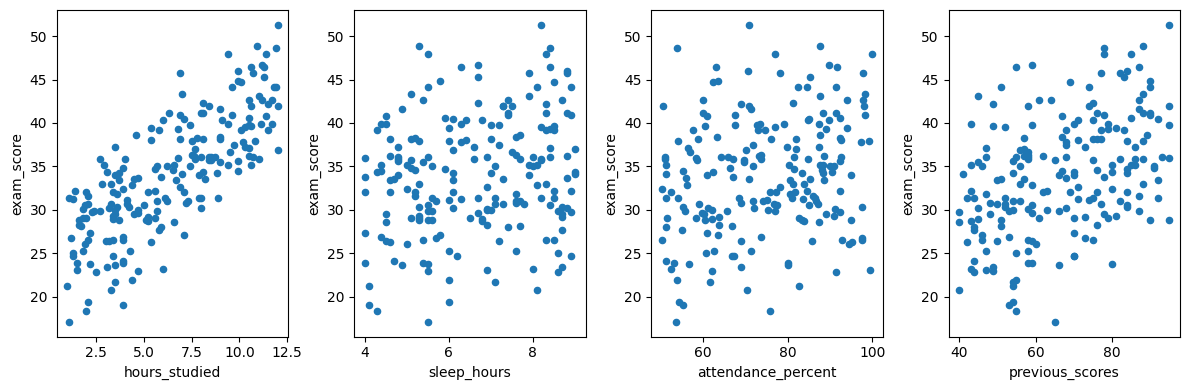

In [19]:
figure, axes = plt.subplots(1, 4, figsize=(12, 4))
df.plot.scatter(
    x = "hours_studied",
    y = "exam_score",
    ax = axes[0]
)
df.plot.scatter(
    x = "sleep_hours",
    y = "exam_score",
    ax = axes[1]
)
df.plot.scatter(
    x = "attendance_percent",
    y = "exam_score",
    ax = axes[2]
)
df.plot.scatter(
    x = "previous_scores",
    y = "exam_score",
    ax = axes[3]
)

plt.tight_layout()
plt.show()

In [20]:
x = df.iloc[:, [1, 2, 3, 4]]
y = df.iloc[:, [5]]
x.columns, y.columns

(Index(['hours_studied', 'sleep_hours', 'attendance_percent',
        'previous_scores'],
       dtype='object'),
 Index(['exam_score'], dtype='object'))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 4) (160, 1)
(40, 4) (40, 1)


In [23]:
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(x_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

7.424443851472047

In [27]:
r2 = r2_score(y_test, y_pred)
r2

0.860101189719408